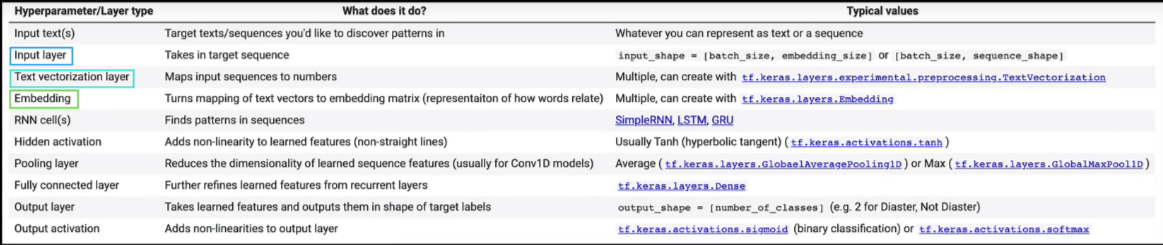

Yardimci fonskiyonlari import edelim.

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-05-22 14:22:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-22 14:22:41 (75.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



Verileri alalim. Veriler twitlerden olusuyor ayrintilar linkte var. Basitce afetlerden/felaketler ile ilgili twitler

https://www.kaggle.com/c/nlp-getting-started 

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2022-05-22 14:22:45--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-05-22 14:22:45 (106 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Verilerimize bir goz atalim.

Veriler twitlerin bir felekat hakkinda yazilip yazilmadigini siniflandiriyor.



In [3]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Verilerimizi karistiralim. Verileri karistirmak modelin ogrenme surecinde etkilidir. Once bir sinifi sonra digerini gormesi bizi uzer karisik gormeli.

In [4]:
train_df_shuffled = train_df.sample(frac=1) 
train_df_shuffled.head()

,id,keyword,location,text,target
7502,10731,wreck,Canada BC,@raineishida lol...Im just a nervous wreck :P,0
6885,9870,traumatised,ELVY,Think I'm traumatised for life,0
4997,7129,military,Boston MA,13 reasons why we love women in the military ...,0
7264,10399,whirlwind,140920-21 & 150718-19 BEIJING,Eyes smile. Pretty smile. Good hair. Miss Luh...,0
3652,5201,fatalities,NaN,RCMP confirm fatalities in two-vehicle crash: ...,1


Test veri setine de bakalim.

In [5]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Veri kumesi siniflar arasinda dagilimi nasil bakalim. Belirli bir sinifin cok baskin olmasi zararlidir sigara gibi.

In [6]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
len(train_df), len(test_df)

(7613, 3263)

Birkac verimize ornek olarak bakalim nasil gorunuyor.

In [8]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(felaket)" if target > 0 else "(felaket degil)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (felaket degil)
Text:
It's cold and my head wants to explode.. The joys of working from home - I'm going back to bed / peace out ????

---

Target: 0 (felaket degil)
Text:
Loved Chicago so much that it game me Pink Eye. Now I sit and design in quarantine and in the dark.

---

Target: 0 (felaket degil)
Text:
It's going on three years that we have been separated. Sometimes you have to let a man know you will leave him. &amp; that u can survive without

---

Target: 1 (felaket)
Text:
ÛÏ@BBCWomansHour: Setsuko Thurlow survived the #Hiroshima bomb. This is her story: http://t.co/cvjYML7KrM http://t.co/FpH01U3eIiÛ

---

Target: 1 (felaket)
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/985DwWPdEt

---



Training ve Validation olarak ayiralim

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, #%10 ununu test olarak kullanacagiz
                                                                            )

Ne kadar verimiz var ve nasil bakalim

In [11]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [12]:
train_sentences[:10], train_labels[:10]

(array(['Suicide bomber kills 15 in Saudi security site mosque  #world #news',
        'Fire Meet Gasoline always gotta get played twice lol',
        "And all you girls that smoke.... have you notice that you started to lose ALOT OF WEIGHT ??? HMMM Don't know body want no thin girl tf",
        "The Rocky Fire burning in northern California is still threatening more than 7000 buildings. It's the largest in the state #9newsmornings",
        "Putin's plan to destroy Western food en masse is causing a huge public backlash http://t.co/FAJbxz5kar",
        'Hollywood Movie About Trapped Miners Released in Chile http://t.co/qkrLtrd39B',
        'Just burned the crap out of my grilled cheese sandwich. Sure wish I had a few life skills figured out by now...',
        'Lone Survivor: The Eyewitness Account of Operation Redwing and the Lost Heroes of SEAL Team\x89Û_ http://t.co/NXtWXJCAVh http://t.co/oL8ESFRGLE',
        '@wocowae Officer Wounded Suspect Killed in Exchange of Gunfire http://t.

## Text to Number
Modelimizin anlamasi icin textleri sayilara cevirmemiz gerekiyor tabi ki de. Cesitli yollari var bakalim.

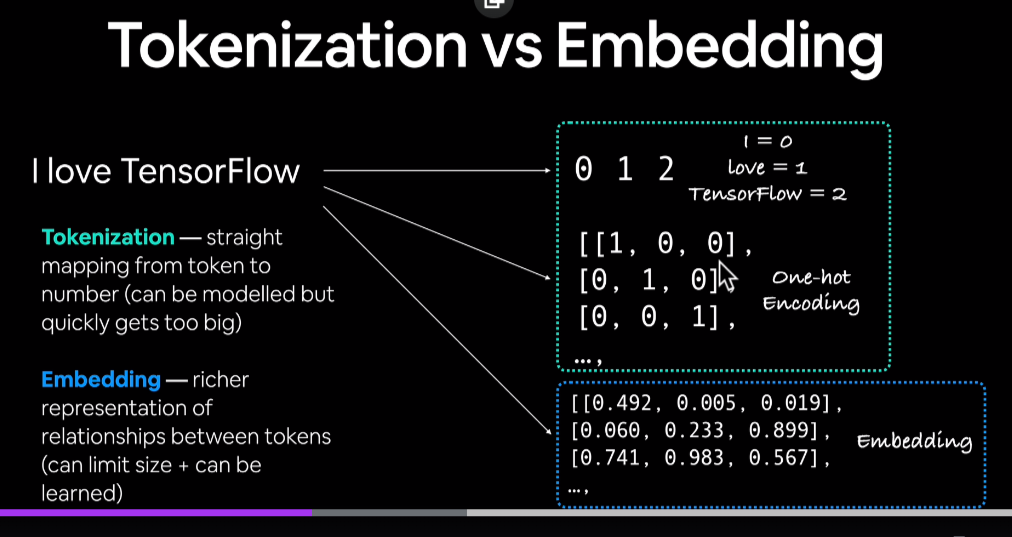

Genis bir konu derin arastirma yapilsin

### Text Vectorization (tokenization)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


#default olarak gelen parametreler ve degerleri
text_vectorizer = TextVectorization(max_tokens=10000, # kac tane kelime oldugu toplamda
                                    standardize="lower_and_strip_punctuation", #isaretleri kaldirir ve harfleri kucultur
                                    split="whitespace", #bosluga gore kelimeleri ayirir
                                    ngrams=None, # n-gram olusturmak icin
                                    output_mode="int", # hangi tipte tokenlenecegi
                                    output_sequence_length=None, # sequence larin hangi uzunlukta olmasini istiyorsak yani en uzun cumle ne ise onun uzunlugu olmali None is gorecektir
                                    pad_to_max_tokens=True)

Ortalama token yani kelime sayisini bulalim twitler icin

In [14]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

Spesifik bir tane tanimlayalim

In [15]:
#text vectorization icin degiskenler tanimlayalim
max_vocab_length = 10000 # max kelime sayisi sozlukteki
max_length = 15 # modelin gorecegi max twit uzunlugu

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

Simdi veri setimize uygulayalim

In [16]:
text_vectorizer.adapt(train_sentences)

Bi ornek olusturalim ve deneyelim

In [17]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[293,   3, 202,   4,  13, 702,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Goruldugu uzeri 6 tane deger ve 9 tane 0 dondu.0 lar tamamlama icin cunku biz max_length ile hepsini 15 olmasi icin ayarlamnistik. Simdide veri setinden bir ornege bakalim.

In [18]:
random_sentence = random.choice(train_sentences)
print(f"Orijinal text:\n{random_sentence}\
        \n\nVectorized versiyonu:")
text_vectorizer([random_sentence])

Orijinal text:
I liked a @YouTube video from @deathmule http://t.co/sxHGFIThJw MK X Tremors Stalag Might Fatality on Ermac Tournament Pharaoh        

Vectorized versiyonu:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,  282,    3,  109,   70,   20,    1,    1,    1, 1094, 7389,
        8179,  811,  520,   11]])>

Olusan sozlukten kelimelere bakalim

In [19]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # en cok kullanilan kelimeler
bottom_5_words = words_in_vocab[-5:] # en az kullanilan kelimeler
print(f"Toplam sozlukte kelime sayisi: {len(words_in_vocab)}")
print(f"En cok kullanilan kelimeler: {top_5_words}")
print(f"En az kullanilan kelimeler: {bottom_5_words}")

Toplam sozlukte kelime sayisi: 10000
En cok kullanilan kelimeler: ['', '[UNK]', 'the', 'a', 'in']
En az kullanilan kelimeler: ['parties', 'particulatebreak', 'particular', 'participating', 'participate']


UNK bilinmeyenler icin kullanilir genelde # gibi isaretler ile baslayanlar bunlardir. Eger max kelimeyi 10000 yerine daha fazla yapsaydik bunlarda yer bulacagi icin UNK sayisi duserdi.

# Creating an Embedding using an Embedding Layer

In [20]:
max_length,

(15,)

Embedding layerı tanımlayalım 
* input_dim - sozlugun(vacobulary) uzunlugu 
* output_dim - embedding vecotrun buyuklugu, ornegin 100 ise her kelime icin 100 buyuklugunde feature vector
* embeddings_initializer - embedding matrixini nasil tanimladiginiz, varsayilan olarak "uniform" 
* input_length - embedding katmanına geecen dizilerin(sequences) uzunluğu.

In [21]:
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim=max_vocab_length, 
                             output_dim=128, 
                             embeddings_initializer="uniform", 
                             input_length=max_length 
                             )

embedding

rasgele ornek alalim ve embedding katmaninin nasil calistigina bakalim

In [22]:
random_sentence = random.choice(train_sentences)
print(f"Orijinal text:\n{random_sentence}\
        \n\nEmbedded hali:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Orijinal text:
9) 'Without the bombing you would have to do hara-kiri you know commit suicide'. http://t.co/UO0aQk9KR8 Hiroshima 70 years ago.        

Embedded hali:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02858141, -0.049982  , -0.02580673, ...,  0.01213497,
          0.03938223, -0.02353511],
        [-0.03172038, -0.01045305, -0.04987391, ..., -0.04657457,
         -0.01601609,  0.00071789],
        [-0.03205308, -0.02279668,  0.01209942, ...,  0.04434946,
         -0.03996599, -0.00171471],
        ...,
        [-0.04153715,  0.0138743 , -0.04712659, ...,  0.04199184,
         -0.01268058,  0.00177317],
        [-0.02667438,  0.02522104, -0.00531876, ...,  0.03264029,
         -0.03455031, -0.04690463],
        [-0.03630563,  0.00492014, -0.01699664, ...,  0.04531512,
         -0.00751791,  0.02593705]]], dtype=float32)>

burada her token 128 uzunlugunda vektorler ile temsil ediliyor,tek bir tokenin embedding katmanindan gectikten sonraki haline bakalaim

In [23]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-2.8581405e-02, -4.9982000e-02, -2.5806725e-02,  3.9383024e-04,
       -1.9697333e-02, -1.7873012e-02,  4.2902343e-03, -3.5688877e-03,
        1.5133027e-02,  3.8078059e-02, -2.5173008e-02, -1.7833330e-02,
       -1.6474187e-02,  4.7121886e-02, -4.7563136e-02, -2.1687388e-02,
        3.5977688e-02,  3.4059320e-02, -5.6096315e-03, -2.2086715e-02,
        2.3247328e-02, -2.9801680e-02,  6.4559802e-03, -4.4673197e-03,
        2.4910185e-02,  1.9276891e-02, -1.4970526e-03,  1.7532159e-02,
       -3.6369622e-02,  1.0591615e-02,  1.2598548e-02,  3.6330111e-03,
        3.7972178e-02,  4.9405936e-02, -3.7753571e-02,  4.5965519e-02,
        2.6661124e-02, -7.4669719e-03,  1.2680341e-02, -1.3769411e-02,
       -2.9896999e-02,  1.0895729e-04, -3.6563993e-02,  1.2765635e-02,
        2.8805736e-02,  3.3241574e-02, -2.6127780e-02, -1.1605501e-02,
       -3.6719810e-02,  7.9632401e-03,  1.6418222e-02,  1.4029074e-02,
        3.0777082e-03, -1.069

unutmayalim, model calistigi zaman bu sayilar daha iyi temsil icin guncellenecektir

# Modelling a text dataset

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network * (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

## Model 0

Pipeline ile 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#tokenization ve modelleme
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # tfidf ile kelimeleri vektorlere donusturur
                    ("clf", MultinomialNB()) #model 
])


model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Model0 in ulastigi accuracy: {baseline_score*100:.2f}%")


Model0 in ulastigi accuracy: 80.05%


Verimiz binary oldugu icin dagilima gore %50 gibi bi deger baslangic olurdu %79 fena olmayan bir deger tabi yeterli degil. 

In [26]:
# Tahmin yaptiralim
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

bu islemi daha cok kullanacagimiz icin bunu fonksiyon haline getirelim

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

sonuclari fonksiyon ile alalim

In [28]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 80.0524934383202,
 'f1': 0.7938913146084909,
 'precision': 0.813298527557473,
 'recall': 0.800524934383202}

# Model 1: A simple dense model (feed-forward neural network)


In [29]:
#kaydewtmek icin daha once tanimladigimiz fonksiyonu kullanacagiz
from helper_functions import create_tensorboard_callback

# kaydedilcek yeri tanimlayalim
SAVE_DIR = "model_logs"

modeli olusturalim

In [30]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) #1 boyutlu string
x = text_vectorizer(inputs) # girdileri sayilara cevirir
x = embedding(x) #sayi seklindeki girdileri embbeding katmanina
x = layers.GlobalAveragePooling1D()(x) #her bir tokeni tek bir vektor ile yogunlastirdik
outputs = layers.Dense(1, activation="sigmoid")(x) #binary oldugu icin sigmoid
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [31]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [32]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_sentences,
                        train_labels, 
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220522-142254
Epoch 1/5
215/215 [==============================] - 7s 5ms/step - loss: 0.6085 - accuracy: 0.7028 - val_loss: 0.5272 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4407 - accuracy: 0.8173 - val_loss: 0.4608 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8619 - val_loss: 0.4451 - val_accuracy: 0.8031
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2822 - accuracy: 0.8904 - val_loss: 0.4522 - val_accuracy: 0.8031
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2355 - accuracy: 0.9108 - val_loss: 0.4686 - val_accuracy: 0.7874


In [33]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7874


[0.46861976385116577, 0.787401556968689]

# Visualizing learned embeddings

Embedding katmaninda ogrenme gerceklesir yani bunlari weight gibi kaydedebiliriz.
https://www.tensorflow.org/tutorials/text/word_embeddings

In [35]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

kaydetmek icin embedding katmaninin weightlerini alalim

In [36]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


10000 token 128 bouyutlu vectorlerde temsil ediliyor

kaydetmek icin..

In [37]:
import io

# https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

colab icin bunu calistirip kaydettigimizi indirleim ve https://projector.tensorflow.org uzeinden inceleyelim

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

indirilen dosyalari siteye upload edip grafigi inceleyelim.
goruldugu gibi 2 farkli sinifa ayrilmaya baslamis, kelimeleride incelersek nasil anlamlandirildigini anlayabiliriz.

daha iyi anlamak icin https://jalammar.github.io/illustrated-word2vec/

# RNN Recurrent Neural Networks

Ayrintili ogrenilmesi gerek bir konu ama burada sadece uygulamasini gorecez. Basitce RNN NLP de cumledeki geliminin temsilini olusturmak icin onceki kelimelerden de ogrendiklerini kullanir.
MIT nin kursunda guzel anlatiliyor izlenir.

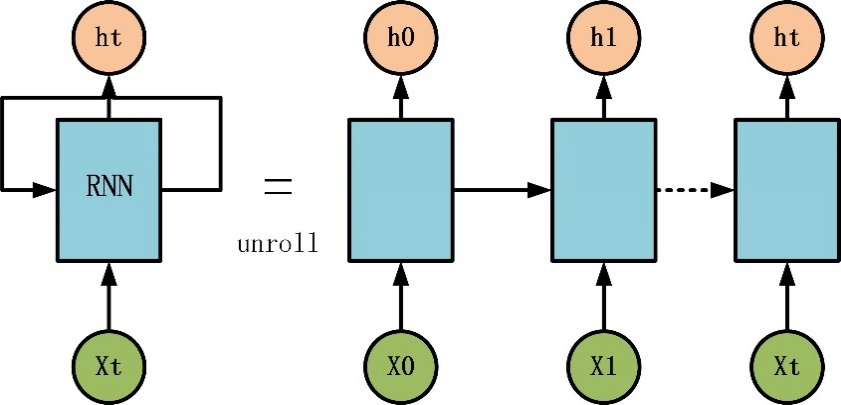

LSTM i anlamak icin guzel bir kaynak. https://colah.github.io/posts/2015-08-Understanding-LSTMs/

# Model 2 LSTM

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

In [41]:
# Create LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
#x = layers.LSTM(64, activation="tanh", return_sequences=True)(x) # yigin halinde lstm kullaanacksak true 
#print(f"After LSTM cell with return_sequences=True: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
print(f"After LSTM cell: {x.shape}")
# x = layers.Dense(64, activation="relu")(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

After embedding: (None, 15, 128)
After LSTM cell: (None, 64)


In [42]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [43]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])


Saving TensorBoard log files to: model_logs/LSTM/20220522-143918
Epoch 1/5
215/215 [==============================] - 7s 9ms/step - loss: 0.2194 - accuracy: 0.9241 - val_loss: 0.5250 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1519 - accuracy: 0.9437 - val_loss: 0.6358 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1236 - accuracy: 0.9534 - val_loss: 0.8208 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1005 - accuracy: 0.9616 - val_loss: 0.8750 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0832 - accuracy: 0.9657 - val_loss: 1.0427 - val_accuracy: 0.7638


Degerlendirelim

In [46]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

((762, 1), array([[7.4041594e-04],
        [9.9952769e-01],
        [2.4811746e-04],
        [7.2399981e-02],
        [4.7056358e-03],
        [2.3609463e-03],
        [6.1229581e-01],
        [9.9956888e-01],
        [9.9770364e-04],
        [6.2178506e-04]], dtype=float32))

In [47]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 1., 1., 0., 0.], dtype=float32)>

In [48]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.37795275590551,
 'f1': 0.7643600798809208,
 'precision': 0.7656150191110378,
 'recall': 0.7637795275590551}

# Model 3: GRU

LSTM ile benzer ozelliklere sahiptir ama daha az parametreye sahiptir.

In [50]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True) # LSTM ile ayni sekilde yiginlar halinde istiyorsak true olmali
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # bir dense layer kullanilabilir
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [51]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [53]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20220522-144620
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.1605 - accuracy: 0.9399 - val_loss: 0.8240 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0813 - accuracy: 0.9683 - val_loss: 0.8993 - val_accuracy: 0.7533
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0668 - accuracy: 0.9717 - val_loss: 1.1748 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0556 - accuracy: 0.9750 - val_loss: 1.0709 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0507 - accuracy: 0.9771 - val_loss: 1.2546 - val_accuracy: 0.7546


In [54]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

((762, 1), array([[7.2780141e-04],
        [9.9979240e-01],
        [1.1749000e-04],
        [1.3032910e-01],
        [5.9375685e-02],
        [9.1443565e-03],
        [4.1959599e-01],
        [9.9994087e-01],
        [3.3654491e-04],
        [2.0115927e-04]], dtype=float32))

In [55]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [56]:
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.45931758530183,
 'f1': 0.7546375185738815,
 'precision': 0.7546844759935312,
 'recall': 0.7545931758530183}

# Model 4: Bidirectonal RNN model



Normal RNN lerden sequencelari soldan saga dogru isleyerek calisir bunda ise once soldan saga sonra da sagdan sola dogru tekrar isleyerek calisiyor ilginc. Tabi bu da islem fazlaligi yaratiyor.

In [57]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) #  return_sequences=True ILE yiginlar seklinde yapabiliriZ
x = layers.Bidirectional(layers.LSTM(64))(x) #
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [58]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [59]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [60]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20220522-145738
Epoch 1/5
215/215 [==============================] - 7s 13ms/step - loss: 0.1089 - accuracy: 0.9682 - val_loss: 0.9771 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0526 - accuracy: 0.9765 - val_loss: 1.1089 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0480 - accuracy: 0.9774 - val_loss: 1.1305 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0438 - accuracy: 0.9781 - val_loss: 1.2786 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0448 - accuracy: 0.9788 - val_loss: 1.3221 - val_accuracy: 0.7533


In [61]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[1.3814814e-04],
       [9.9641657e-01],
       [2.7261654e-05],
       [1.8323708e-01],
       [7.2150663e-03],
       [5.0324685e-04],
       [1.3145117e-01],
       [9.9819428e-01],
       [3.3201180e-05],
       [9.9510959e-05]], dtype=float32)

In [62]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [63]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.32808398950131,
 'f1': 0.7502307986785448,
 'precision': 0.7528809345138577,
 'recall': 0.7532808398950132}

iyi bir performansda gostermedi ama olsun tecrube oldu.

# Model 5: Conv1D (CNN)


**Convolutional Neural Networks for Text** 

 `Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)`

text verileri 1D yani 1 boyutlulardir.

In [64]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # conv katmani 5 kelime icin

conv_1d_output = conv_1d(embedding_test) # 1D convolutional layer dan embedding den sonra gecirme
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # en onemli featurelari al
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [65]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [66]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 1)              

In [68]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220522-154210
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1357 - accuracy: 0.9588 - val_loss: 0.8907 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0772 - accuracy: 0.9699 - val_loss: 1.0538 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0640 - accuracy: 0.9743 - val_loss: 1.1559 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0558 - accuracy: 0.9756 - val_loss: 1.2158 - val_accuracy: 0.7441
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0561 - accuracy: 0.9756 - val_loss: 1.2873 - val_accuracy: 0.7480


In [69]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[4.4017906e-08],
       [9.9487227e-01],
       [3.5924622e-04],
       [8.1531145e-02],
       [7.9442598e-03],
       [3.9027893e-04],
       [2.8075051e-01],
       [9.9265927e-01],
       [1.3346619e-04],
       [2.3192299e-05]], dtype=float32)

In [70]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [71]:
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 74.80314960629921,
 'f1': 0.7452691261009273,
 'precision': 0.7472042695561641,
 'recall': 0.7480314960629921}

# Model 6: TensorFlow Hub Pretrained Sentence Encoder

***Using Pretrained Embeddings (transfer learning for NLP)***

